# 큐, 스택 복습

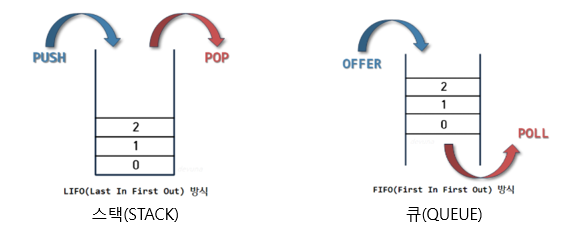

### 스택(stack)

In [1]:
stack = []
print(stack)

[]


In [2]:
stack.append(1)
print(stack)

[1]


In [3]:
stack.append(2)
print(stack)

[1, 2]


In [4]:
stack.append(3)
print(stack)

[1, 2, 3]


In [5]:
print(stack.pop())
print(stack)

3
[1, 2]


In [6]:
print(stack.pop())
print(stack)

2
[1]


In [7]:
print(stack.pop())
print(stack)

1
[]


In [8]:
# remove, del 등이 아니라 pop을 쓰는 이유는
# pop이 값을 꺼내서 리턴해주기 때문

In [9]:
# del은 인덱스를 기준으로 삭제
a = [1, 2, 3]
del a[1]
print(a)

[1, 3]


In [10]:
# remove는 가장 처음 찾은 값 삭제
a = [1, 2, 3, 1]
a.remove(1)
print(a)

[2, 3, 1]


### 큐(queue)

In [11]:
q = []
print(q)

[]


In [12]:
q.append(1)
print(q)

[1]


In [13]:
q.append(2)
print(q)

[1, 2]


In [14]:
q.append(3)
print(q)

[1, 2, 3]


In [15]:
print(q.pop(0))
print(q)

1
[2, 3]


In [16]:
print(q.pop(0))
print(q)

2
[3]


In [17]:
print(q.pop(0))
print(q)

3
[]


### deque 이용해서 큐 구현

In [18]:
from collections import deque

In [19]:
q = deque()
print(q)
print(type(q))
q = list(q)
print(q)
print(type(q))

deque([])
<class 'collections.deque'>
[]
<class 'list'>


In [20]:
q = deque()
q.append(1)
print(q)

deque([1])


In [21]:
q.append(2)
print(q)

deque([1, 2])


In [22]:
q.append(3)
print(q)

deque([1, 2, 3])


In [23]:
q.popleft()
print(q)

deque([2, 3])


In [24]:
q.popleft()
print(q)

deque([3])


In [25]:
q.popleft()
print(q)

deque([])


In [26]:
# deque 역순 정렬

In [27]:
a = ['a', 'b', 'c', 'd']
q = deque()
q.append(a)
print(q)

deque([['a', 'b', 'c', 'd']])


In [28]:
# 큐에 하나의 리스트가 들어가있기 때문에 원소 하나로 취급
q.reverse()
print(q)
print(len(q))

deque([['a', 'b', 'c', 'd']])
1


In [29]:
# extend: 각각의 원소를 하나씩 넣음
a = ['a', 'b', 'c', 'd']
q = deque()
q.extend(a)
print(q)

deque(['a', 'b', 'c', 'd'])


In [30]:
q.reverse()
print('길이:', len(q) ,'\n', q)

길이: 4 
 deque(['d', 'c', 'b', 'a'])


In [31]:
# deque 회전

In [32]:
a = ['a', 'b', 'c', 'd']
q = deque()
q.extend(a)
print(q)

deque(['a', 'b', 'c', 'd'])


In [33]:
q.rotate()
print(q)

deque(['d', 'a', 'b', 'c'])


In [34]:
q.rotate()
print(q)

deque(['c', 'd', 'a', 'b'])


In [35]:
q.rotate()
print(q)

deque(['b', 'c', 'd', 'a'])


In [36]:
q.rotate()
print(q)

deque(['a', 'b', 'c', 'd'])


## DFS / BFS

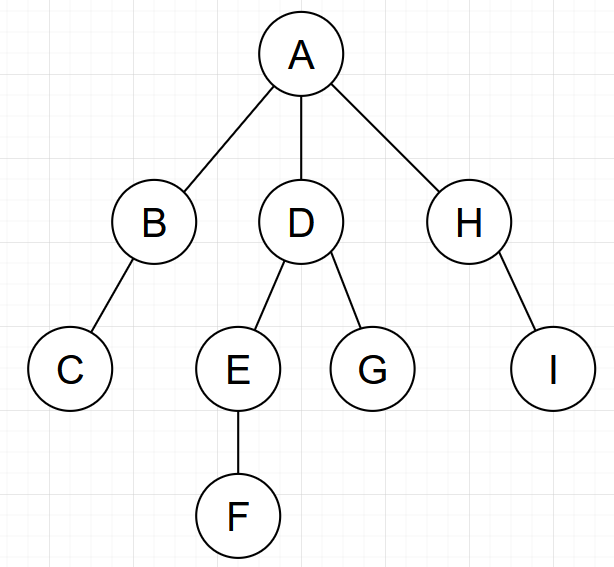

In [37]:
graph = {
    'A': ['H', 'D', 'B'],
    'B': ['C'],
    'D': ['G', 'E'],
    'E': ['F'],
    'H': ['I'],
}
print(graph)

{'A': ['H', 'D', 'B'], 'B': ['C'], 'D': ['G', 'E'], 'E': ['F'], 'H': ['I']}


In [38]:
# DFS 풀이
# 매우 다양한 방식 존재(재귀, 백트랙킥?)
# BFS와 비슷하며 쉽게 수정 가능한 방식
def dfs(graph, root, visited):
    stack.append(root)
    
    while stack:
        now = stack.pop() # now = 'A', stack = []
        if now not in visited:
            visited.append(now)
            if graph.get(now):
                stack.extend(graph[now])
                

stack = []
visited = []
dfs(graph, 'A', visited)
print(visited)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


In [39]:
# BFS 풀이
from collections import deque

# visited는 함수 내에서 값 수정이 없기 때문에 굳이 안넣어줘도됨
def bfs(graph, root):
    q.append(root)
    
    while q:
        now = q.popleft()
        if now not in visited:
            visited.append(now)
            if graph.get(now):
                q.extend(graph[now])
                

q = deque()
visited = []
bfs(graph, 'A')
print(visited)

['A', 'H', 'D', 'B', 'I', 'G', 'E', 'C', 'F']


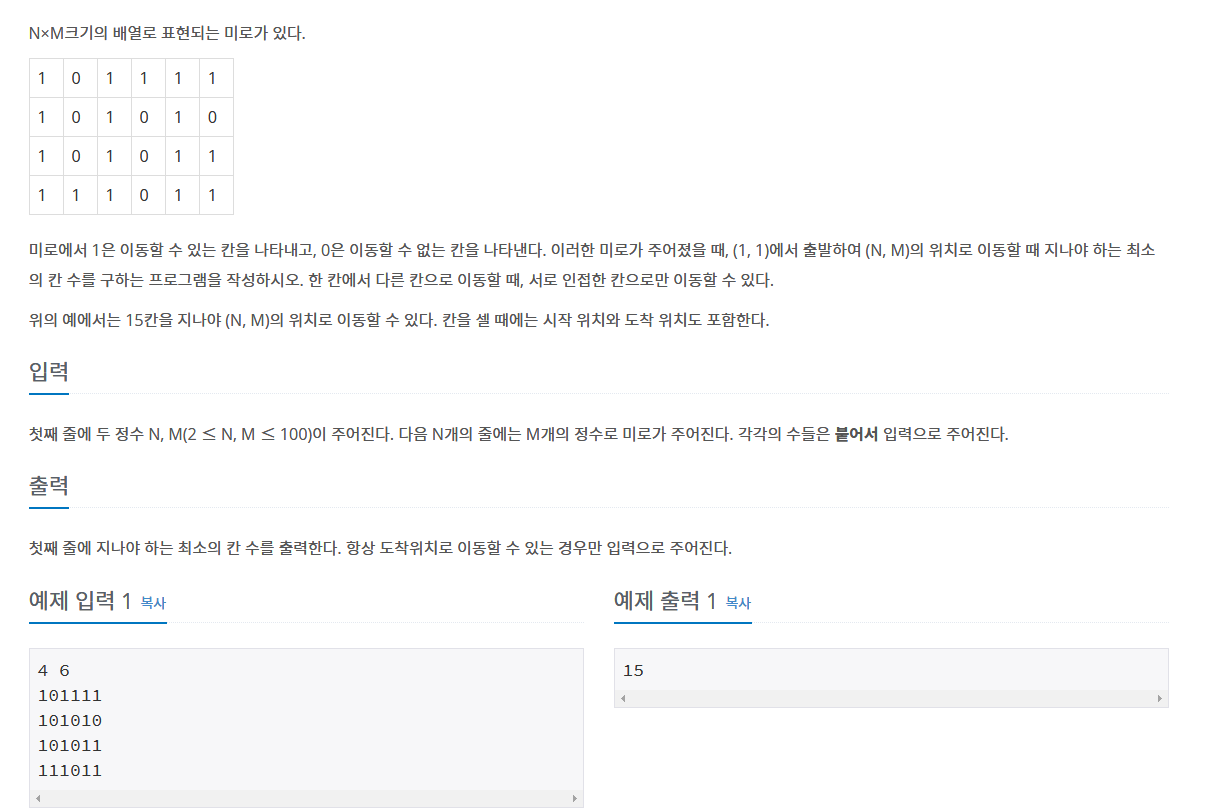

https://www.acmicpc.net/problem/2178

In [40]:
# BFS 풀이

from collections import deque

dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

def bfs(board, start):
    global mirror
    q = deque()
    q.append(start)
    while q:
        x,y = q.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if nx >= 0 and ny >= 0 and nx < n and ny < m:
                if board[nx][ny] == '1':
                    mirror[nx][ny] = mirror[x][y] + 1
                    board[nx][ny] = -1
                    q.append([nx, ny])

n, m = map(int, input().split())
board = [list(input()) for _ in range(n)]
print(board)
mirror = [[0]*m for _ in range(n)]
board[0][0] = 0
start = [0,0]
bfs(board, start)
print(mirror[n-1][m-1]+1)

4 6
101111
101010
101011
111011
[['1', '0', '1', '1', '1', '1'], ['1', '0', '1', '0', '1', '0'], ['1', '0', '1', '0', '1', '1'], ['1', '1', '1', '0', '1', '1']]
15


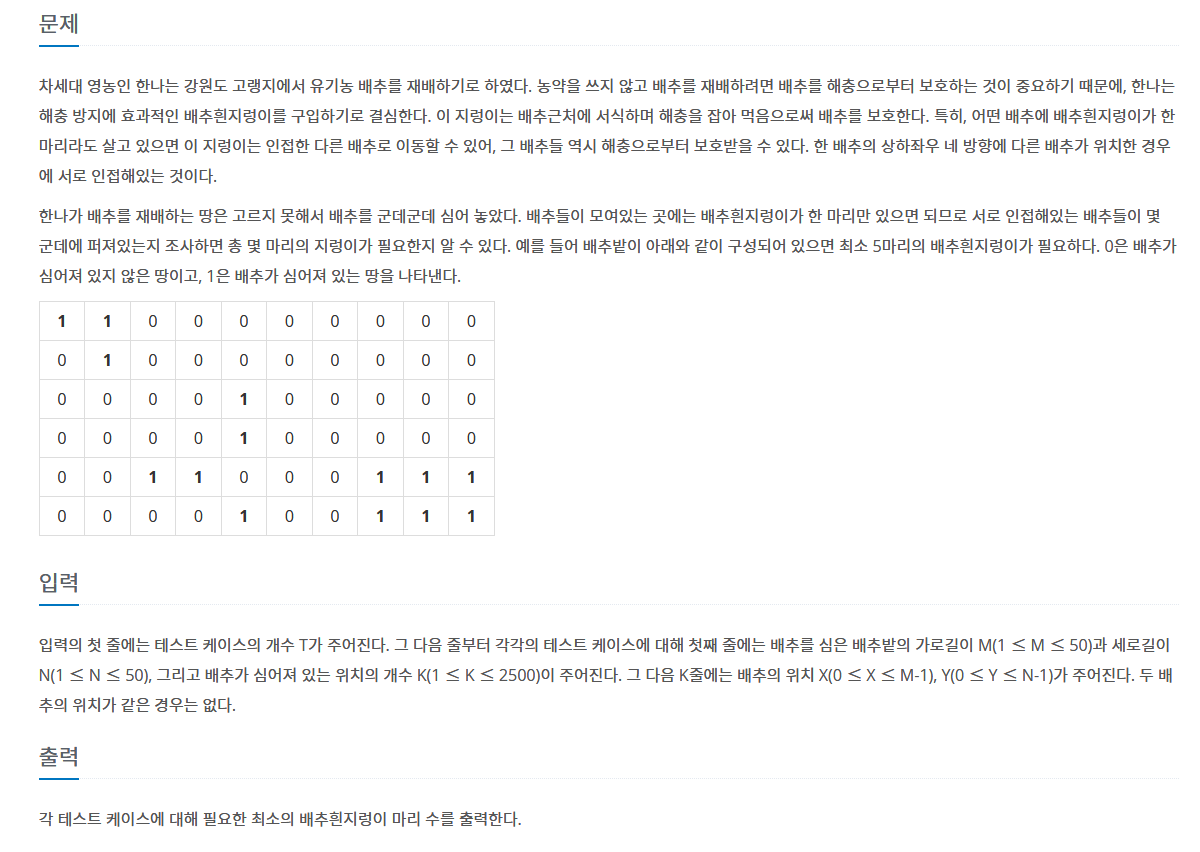

https://www.acmicpc.net/problem/1012

In [43]:
# DFS 풀이

import sys
sys.setrecursionlimit(10**6) #재귀 깊이 기본 10만을 100만으로 늘려줌
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]


def dfs(board, x, y):
    board[x][y] = 0
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if nx >= 0 and ny >= 0 and nx < n and ny < m:
            if board[nx][ny] == 1:
                dfs(board, nx, ny)

T = int(input())

for _ in range(T):
    m, n, k = map(int, input().split())
    veg = [list(map(int, input().split())) for _ in range(k)]
    board = [[0] * m for _ in range(n)]
    result = 0
    for x,y in veg:
        board[y][x] = 1
    for i in range(n):
        for j in range(m):
            if board[i][j] == 1:
                dfs(board, i, j)
                result += 1
    print(result)

1
5 3 6
0 2
1 2
2 2
3 2
4 2
4 0
2


In [44]:
# BFS 풀이

from collections import deque
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

def bfs(a,b,board):
    q = deque()
    q.append([a,b])
    while q:
        x, y = q.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if nx >= 0 and ny >= 0 and nx < n and ny < m:
                if board[nx][ny] == 1:
                    board[nx][ny] = 0
                    q.append([nx,ny])

T = int(input())
for tc in range(T):
    n, m, k = map(int, input().split())
    board = [[0] * m for _ in range(n)]
    cnt = 0
    for i in range(k):
        a, b = map(int, input().split())
        board[a][b] = 1
    for i in range(n):
        for j in range(m):
            if board[i][j] == 1:
                bfs(i,j,board)
                cnt += 1
    print(cnt)

1
5 3 6
0 2
1 2
2 2
3 2
4 2
4 0
2
